Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2242
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 2242 files belonging to 9 classes.
Using 1794 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')

Found 2242 files belonging to 9 classes.
Using 448 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

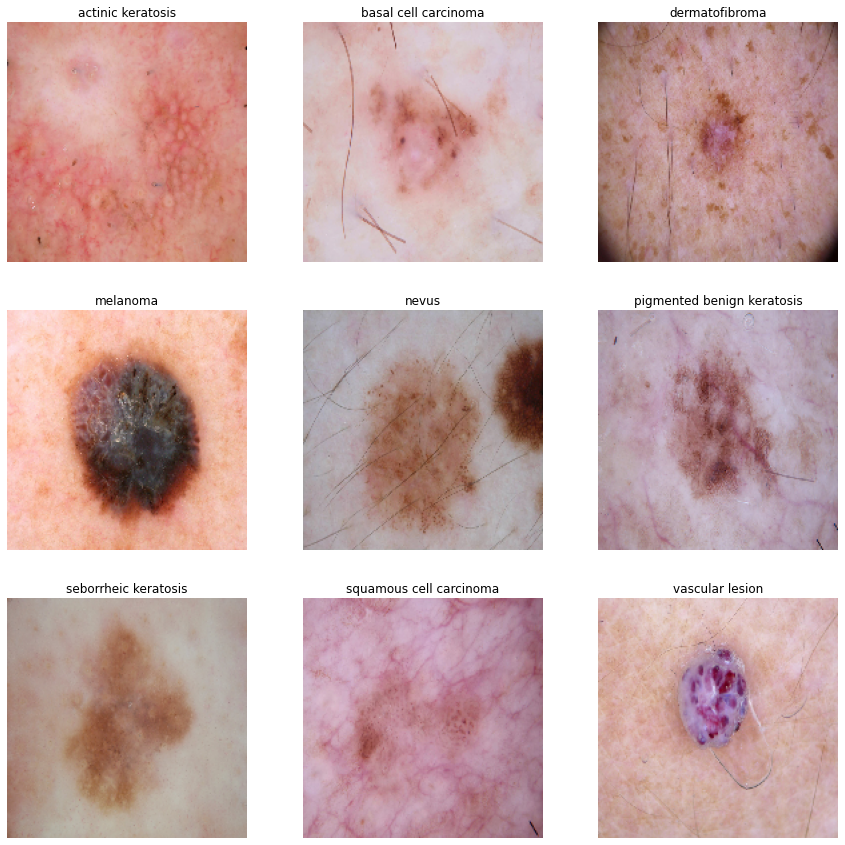

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    #plt.imshow(c[index].numpy().astype("uint8"))
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
from matplotlib.cbook import flatten
from tensorflow.python.framework.tensor_util import FastAppendBFloat16ArrayToTensorProto
### Your code goes here
model=Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
layers.Conv2D(16,3,padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32,3,padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64,3,padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128,activation='relu'),
layers.Dense(9),
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 232s 811ms/step - loss: 8.2788 - accuracy: 0.2001 - val_loss: 8.0064 - val_accuracy: 0.1875
Epoch 2/20
57/57 [==============================] - 1s 26ms/step - loss: 8.2233 - accuracy: 0.1973 - val_loss: 8.0064 - val_accuracy: 0.1875
Epoch 3/20
57/57 [==============================] - 1s 25ms/step - loss: 8.2233 - accuracy: 0.1973 - val_loss: 8.0064 - val_accuracy: 0.1875
Epoch 4/20
57/57 [==============================] - 1s 25ms/step - loss: 8.2233 - accuracy: 0.1973 - val_loss: 8.0064 - val_accuracy: 0.1875
Epoch 5/20
57/57 [==============================] - 1s 24ms/step - loss: 8.2233 - accuracy: 0.1973 - val_loss: 8.0064 - val_accuracy: 0.1875
Epoch 6/20
57/57 [==============================] - 1s 24ms/step - loss: 8.2233 - accuracy: 0.1973 - val_loss: 8.0064 - val_accuracy: 0.1875
Epoch 7/20
57/57 [==============================] - 1s 25ms/step - loss: 8.2233 - accuracy: 0.1973 - val_loss: 8.0064 - val_accuracy: 0.1875
Epoch 8/20

### Visualizing training results

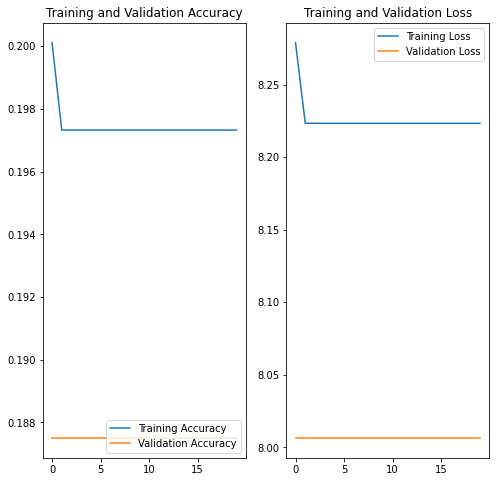

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

1.As the training accuracy increases linearly over time,
2.As the training loss dereases with epochs the validation loss increases.
3.The plots show that training accuracy and validation accuracy are off by large margins.
4.The difference in accuracy between training and validation accuracy is noticeable is overfitting.

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

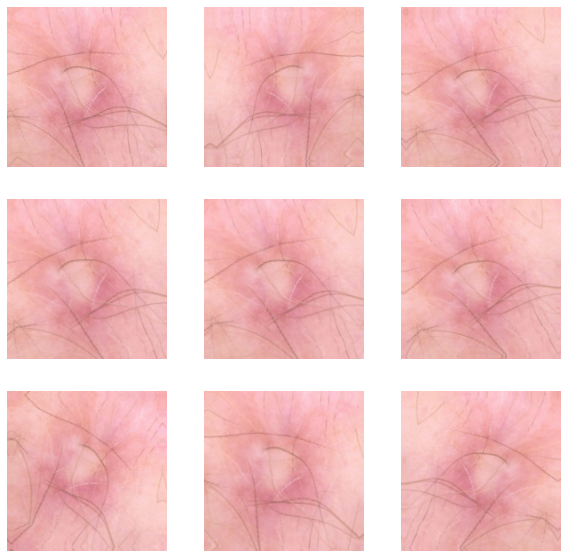

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model=Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
layers.Conv2D(64,3,padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(128,3,padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(256,activation='relu'),
layers.Dense(9),
])


### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history =model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 7s 109ms/step - loss: 11.1284 - accuracy: 0.1734 - val_loss: 10.9566 - val_accuracy: 0.1496
Epoch 2/20
57/57 [==============================] - 5s 92ms/step - loss: 11.1432 - accuracy: 0.1739 - val_loss: 10.9566 - val_accuracy: 0.1496
Epoch 3/20
57/57 [==============================] - 5s 93ms/step - loss: 11.1432 - accuracy: 0.1739 - val_loss: 10.9566 - val_accuracy: 0.1496
Epoch 4/20
57/57 [==============================] - 5s 93ms/step - loss: 11.1432 - accuracy: 0.1739 - val_loss: 10.9566 - val_accuracy: 0.1496
Epoch 5/20
57/57 [==============================] - 5s 93ms/step - loss: 11.1432 - accuracy: 0.1739 - val_loss: 10.9566 - val_accuracy: 0.1496
Epoch 6/20
57/57 [==============================] - 5s 94ms/step - loss: 11.1432 - accuracy: 0.1739 - val_loss: 10.9566 - val_accuracy: 0.1496
Epoch 7/20
57/57 [==============================] - 5s 94ms/step - loss: 11.1432 - accuracy: 0.1739 - val_loss: 10.9566 - val_accuracy: 0.149

### Visualizing the results

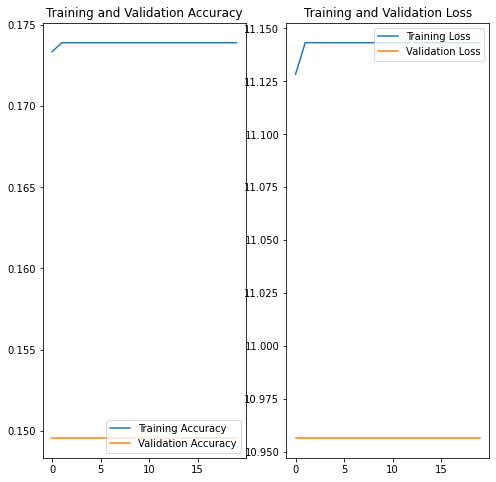

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.
As the training loss decreases with epochs the validation loss decreases


Analys the current class distribution in the training dataset

Datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others.

Class imbalance can have a detrimental effect on the final model quality.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
for i in range(len(class_names)):
  print(class_names[i],' : ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  :  114
basal cell carcinoma  :  379
dermatofibroma  :  95
melanoma  :  438
nevus  :  357
pigmented benign keratosis  :  462
seborrheic keratosis  :  77
squamous cell carcinoma  :  181
vascular lesion  :  139


A class has the least number of samples

1.seborrheic keratosis with 77 samples

Which classes dominate the data in terms proportionate number of samples?

2.pigmented benign keratosis with 462 samples


#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6B7C4D2BE0>: 100%|██████████| 500/500 [00:19<00:00, 25.47 Samples/s]


Initialised with 379 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B7C48AD30>: 100%|██████████| 500/500 [00:19<00:00, 25.75 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6BD0732CA0>: 100%|██████████| 500/500 [00:21<00:00, 22.79 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6BD075F9A0>: 100%|██████████| 500/500 [01:33<00:00,  5.37 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BD073AF10>: 100%|██████████| 500/500 [01:19<00:00,  6.25 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BD072FD90>: 100%|██████████| 500/500 [00:19<00:00, 25.18 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6BF36B28E0>: 100%|██████████| 500/500 [00:44<00:00, 11.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BE66305E0>: 100%|██████████| 500/500 [00:19<00:00, 25.43 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6BF36B28E0>: 100%|██████████| 500/500 [00:19<00:00, 25.41 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025915.jpg_8f17af3f-e1d7-4af4-ab9b-27b966391c9e.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025199.jpg_0f94483e-0ecd-4eaa-bcdf-bcdfc5250439.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025434.jpg_73405c03-928e-47b5-979f-99255ec3199b.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025136.jpg_0186596d-8517-495e-844a-9bd4dc2e1db4.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Ski

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [29]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [30]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [31]:
new_df['Label'].value_counts()

pigmented benign keratosis    500
melanoma                      500
squamous cell carcinoma       500
dermatofibroma                500
seborrheic keratosis          500
vascular lesion               500
basal cell carcinoma          500
actinic keratosis             500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [33]:
data_dir_train="/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6742 files belonging to 9 classes.
Using 5394 files for training.


#### **Todo:** Create a validation dataset

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6742 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [35]:
## your code goes here
input_shape = (180,180,3)
model=Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape),
layers.Conv2D(32,3,padding='same', activation='relu',input_shape=input_shape),
layers.Conv2D(32,3,padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=2),
layers.BatchNormalization(),
layers.Dropout(0.25),
layers.Conv2D(64,3,padding='same', activation='relu'),
layers.Conv2D(64,3,padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=2),
layers.BatchNormalization(),
layers.Dropout(0.4),
layers.Conv2D(128,3,padding='same', activation='relu'),
layers.MaxPooling2D(pool_size=2),
layers.BatchNormalization(),
layers.Dropout(0.4),
layers.Flatten(),
layers.Dense(256,activation='relu'),
layers.BatchNormalization(),
layers.Dropout(0.5),
layers.Dense(1),
])



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [36]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)       

#### **Todo:**  Train your model

In [37]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 38s 205ms/step - loss: nan - accuracy: 0.0912 - val_loss: nan - val_accuracy: 0.0898
Epoch 2/30
169/169 [==============================] - 34s 194ms/step - loss: nan - accuracy: 0.0914 - val_loss: nan - val_accuracy: 0.0898
Epoch 3/30
169/169 [==============================] - 35s 203ms/step - loss: nan - accuracy: 0.0914 - val_loss: nan - val_accuracy: 0.0898
Epoch 4/30
169/169 [==============================] - 34s 195ms/step - loss: nan - accuracy: 0.0914 - val_loss: nan - val_accuracy: 0.0898
Epoch 5/30
169/169 [==============================] - 34s 193ms/step - loss: nan - accuracy: 0.0914 - val_loss: nan - val_accuracy: 0.0898
Epoch 6/30
169/169 [==============================] - 34s 195ms/step - loss: nan - accuracy: 0.0914 - val_loss: nan - val_accuracy: 0.0898
Epoch 7/30
169/169 [==============================] - 35s 202ms/step - loss: nan - accuracy: 0.0914 - val_loss: nan - val_accuracy: 0.0898
Epoch 8/30
169/169 [=======

#### **Todo:**  Visualize the model results

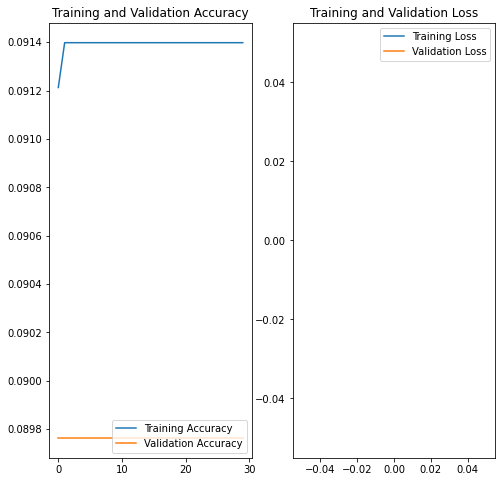

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

The class rebalance helped in reducing overfititng of the data and thus the loass is beng reduced But it reduced the Acurracy very low



Then we introduced dropout and ImageDataGenerator which reduced the over fit

Class rebalance helps in augmentation and achieving the best Training and validation accuracy.

